# Restaurant Price Prediction

In [2]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## loading dataset

In [7]:
train_df = pd.read_excel('Participants_Data_Final/Data_Train.xlsx')
test_df = pd.read_excel('Participants_Data_Final/Data_Test.xlsx')

In [8]:
train_df.shape , test_df.shape

((12690, 9), (4231, 8))

In [9]:
train_df.duplicated().sum(), test_df.duplicated().sum()

(25, 1)

In [10]:
train_df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [12]:
train_df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [13]:
train_df.describe(include='all')

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
count,12690,12690.000000,12690,12690,12578,12592,12688,11486,12690.000000
unique,113,NaN,4155,2689,359,1416,32,1847,NaN
top,QUICK BITES,NaN,South Indian,11am – 11pm (Mon-Sun),Chennai,Gachibowli,3.9,44 votes,NaN
freq,4218,NaN,532,1415,2174,166,1238,71,NaN
mean,NaN,7759.134121,NaN,NaN,NaN,NaN,NaN,NaN,655.252246
std,NaN,4504.874150,NaN,NaN,NaN,NaN,NaN,NaN,627.003540
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,20.000000
25%,NaN,3863.250000,NaN,NaN,NaN,NaN,NaN,NaN,300.000000
50%,NaN,7740.000000,NaN,NaN,NaN,NaN,NaN,NaN,500.000000
75%,NaN,11688.750000,NaN,NaN,NaN,NaN,NaN,NaN,800.000000


In [14]:
train_df[train_df.duplicated()==True].count()

TITLE            25
RESTAURANT_ID    25
CUISINES         25
TIME             25
CITY             25
LOCALITY         25
RATING           25
VOTES            21
COST             25
dtype: int64

In [15]:
train_df[train_df['RESTAURANT_ID'].isin(test_df['RESTAURANT_ID'])]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
15,"CASUAL DINING,IRANI CAFE",12401,"Parsi, Hyderabadi","11:30am – 11:30pm (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Jubilee Hills,4.5,2499 votes,1400
34,BEVERAGE SHOP,1494,"Beverages, Coffee, Tea",6am – 11pm (Mon-Sun),Chennai,Besant Nagar,2.7,132 votes,500
59,CASUAL DINING,638,"North Indian, South Indian, Fast Food, Chinese",7am – 11:30pm (Mon-Sun),Chennai,T. Nagar,3.9,196 votes,800
66,QUICK BITES,11999,Arabian,11am – 11pm (Mon-Sun),Bangalore,BTM,3.4,6 votes,100
...,...,...,...,...,...,...,...,...,...
12564,QUICK BITES,13066,"South Indian, Street Food, Chinese, North Indian",6:30am – 10pm (Mon-Sun),Hyderabad,Somajiguda,3.8,90 votes,350
12580,None,1824,Biryani,7pm – 4am (Mon-Sun),Bangalore,Sanjay Nagar,NEW,NaN,400
12595,QUICK BITES,14717,"South Indian, North Indian, Chinese",7am – 10:30pm (Mon-Sun),Bangalore,Whitefield,2.9,203 votes,450
12620,CASUAL DINING,14973,"South Indian, North Indian, Italian, Chinese, ...",8am – 11:30pm (Mon-Sun),Mumbai,Ghodbunder Road,4.3,830 votes,700


In [16]:
test_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TITLE,4231,86,QUICK BITES,1416,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RESTAURANT_ID,4231.0,NaN,NaN,NaN,7791.438431,4458.797621,3.0,3908.5,7798.0,11634.0,15572.0
CUISINES,4231,1727,"North Indian, Chinese",213,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TIME,4231,1183,11am – 11pm (Mon-Sun),447,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CITY,4196,151,Bangalore,686,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LOCALITY,4201,834,Kukatpally,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RATING,4229,31,3.8,414,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VOTES,3829,1136,6 votes,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
plt.figure(figsize=(15,12))
train_df.groupby(['RATING'])['COST'].mean().plot(kind='bar')

<AxesSubplot:xlabel='RATING'>

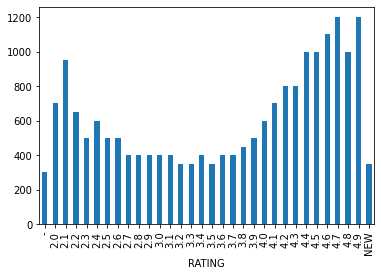

In [18]:
train_df.groupby(['RATING'])['COST'].median().plot(kind='bar')

## Preprocessing

In [19]:
# converting to object type to replace - and NEW rating which will cause error if directly replaced from float type
train_df['RATING'] = train_df['RATING'].astype('object')
# for test set
test_df['RATING'] = test_df['RATING'].astype('object')


In [20]:
# replacing the rating
train_df['RATING'] = train_df['RATING'].replace({'-':0.0, 'NEW':5.0}) 
# for test set
test_df['RATING'] = test_df['RATING'].replace({'-':0.0, 'NEW':5.0})

In [21]:
train_df['RATING'].describe()

count     12688
unique       32
top         3.9
freq       1238
Name: RATING, dtype: object

In [22]:
train_df['RATING'] = train_df['RATING'].astype('float')
# for test set
test_df['RATING'] = test_df['RATING'].astype('float')

In [23]:
train_df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [24]:
test_df.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [25]:
train_df['CITY'].fillna('Missing', inplace=True)  
train_df['LOCALITY'].fillna('Missing', inplace=True)  
train_df['RATING'].fillna(3.8, inplace=True)  
train_df['VOTES'].fillna(0.0, inplace=True) 

In [26]:
test_df['CITY'].fillna('Missing', inplace=True)  
test_df['LOCALITY'].fillna('Missing', inplace=True)  
test_df['RATING'].fillna(3.8, inplace=True)  
test_df['VOTES'].fillna(0.0, inplace=True) 

In [27]:
train_df['VOTES'] = train_df['VOTES'].str.replace(' votes', '').astype(float)
test_df['VOTES'] = test_df['VOTES'].str.replace(' votes', '').astype(float)

In [28]:
train_df['COST'] = train_df['COST'].astype(float)

In [29]:
df = train_df.append(test_df,ignore_index=True)

In [30]:
df = df.drop("RESTAURANT_ID",axis=1)
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0
...,...,...,...,...,...,...,...,...
16916,CASUAL DINING,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287.0,NaN
16917,None,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469.0,NaN
16918,QUICK BITES,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53.0,NaN
16919,QUICK BITES,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,0.0,NaN,NaN


<AxesSubplot:>

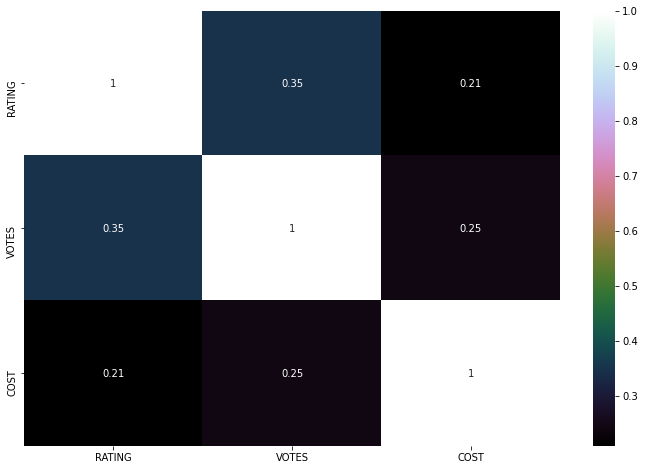

In [31]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="cubehelix", annot=True)

In [32]:
def extract_closed(time):
    a = re.findall('Closed \(.*?\)', time)
    if a != []:
        return a[0]
    else:
        return 'NA'
    
df['CLOSED'] = df['TIME'].apply(extract_closed)

In [33]:
df['TIME'] = df['TIME'].str.replace(r'Closed \(.*?\)','')

In [34]:
df.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CLOSED
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,NA
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,NA
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0,NA
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0,NA
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0,NA


In [35]:
df['TITLE'].nunique(), df['CUISINES'].nunique()

(123, 5183)

In [36]:
#calculating mean by localoty and city

calc_mean = df.groupby(['CITY'], axis=0).agg({'RATING': 'mean'}).reset_index()
calc_mean.columns = ['CITY','CITY_MEAN_RATING']
df = df.merge(calc_mean, on=['CITY'],how='left')

calc_mean = df.groupby(['LOCALITY'], axis=0).agg({'RATING': 'mean'}).reset_index()
calc_mean.columns = ['LOCALITY','LOCALITY_MEAN_RATING']
df = df.merge(calc_mean, on=['LOCALITY'],how='left')

In [37]:
df.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CLOSED,CITY_MEAN_RATING,LOCALITY_MEAN_RATING
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,NA,4.155932,3.833333
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,NA,3.642732,3.620370
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0,NA,3.642732,3.550000
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0,NA,4.019818,4.154054
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0,NA,4.019818,4.134568


In [38]:
df.isnull().sum()

TITLE                      0
CUISINES                   0
TIME                       0
CITY                       0
LOCALITY                   0
RATING                     0
VOTES                   1606
COST                    4231
CLOSED                     0
CITY_MEAN_RATING           0
LOCALITY_MEAN_RATING       0
dtype: int64

In [39]:
df = df.drop('VOTES', axis=1)

In [40]:
df.isnull().sum()

TITLE                      0
CUISINES                   0
TIME                       0
CITY                       0
LOCALITY                   0
RATING                     0
COST                    4231
CLOSED                     0
CITY_MEAN_RATING           0
LOCALITY_MEAN_RATING       0
dtype: int64

In [41]:
df['title_rating'] = df['TITLE'].map(df.groupby('TITLE')['RATING'].mean())
df['title_rating_count'] = df['TITLE'].map(df.groupby('TITLE')['RATING'].count())
df['city_rating'] = df['CITY'].map(df.groupby('CITY')['RATING'].mean())
df['city_rating_count'] = df['CITY'].map(df.groupby('CITY')['RATING'].count())
df['cuisine_rating'] = df['CUISINES'].map(df.groupby('CUISINES')['RATING'].mean())
df['cuisine_rating_count'] = df['CUISINES'].map(df.groupby('CUISINES')['RATING'].count())



In [42]:
df['title_rating_sum'] = df['TITLE'].map(df.groupby('TITLE')['RATING'].sum())
df['title_rating_count_sum'] = df['TITLE'].map(df.groupby('TITLE')['RATING'].sum())
df['city_rating_sum'] = df['CITY'].map(df.groupby('CITY')['RATING'].sum())
df['city_rating_count_sum'] = df['CITY'].map(df.groupby('CITY')['RATING'].sum())
df['cuisine_rating_sum'] = df['CUISINES'].map(df.groupby('CUISINES')['RATING'].sum())
df['cuisine_rating_count_sum'] = df['CUISINES'].map(df.groupby('CUISINES')['RATING'].sum())

In [43]:
df.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,COST,CLOSED,CITY_MEAN_RATING,LOCALITY_MEAN_RATING,...,city_rating,city_rating_count,cuisine_rating,cuisine_rating_count,title_rating_sum,title_rating_count_sum,city_rating_sum,city_rating_count_sum,cuisine_rating_sum,cuisine_rating_count_sum
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,1200.0,NA,4.155932,3.833333,...,4.155932,118,3.600000,1,17928.8,17928.8,490.4,490.4,3.6,3.6
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,1500.0,NA,3.642732,3.620370,...,3.642732,2855,4.200000,1,1897.8,1897.8,10400.0,10400.0,4.2,4.2
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,800.0,NA,3.642732,3.550000,...,3.642732,2855,3.650000,4,17928.8,17928.8,10400.0,10400.0,14.6,14.6
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,800.0,NA,4.019818,4.154054,...,4.019818,2311,4.066667,3,20224.2,20224.2,9289.8,9289.8,12.2,12.2
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,300.0,NA,4.019818,4.134568,...,4.019818,2311,3.479487,117,1888.6,1888.6,9289.8,9289.8,407.1,407.1


In [44]:
from sklearn.preprocessing import LabelEncoder
cols = ('CUISINES', 'TIME', 'LOCALITY', 'TITLE', 'CITY')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

# shape        
print('Shape all_data: {}'.format(df.shape))

Shape all_data: (16921, 22)


In [45]:
df.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,COST,CLOSED,CITY_MEAN_RATING,LOCALITY_MEAN_RATING,...,city_rating,city_rating_count,cuisine_rating,cuisine_rating_count,title_rating_sum,title_rating_count_sum,city_rating_sum,city_rating_count_sum,cuisine_rating_sum,cuisine_rating_count_sum
0,34,3294,1125,401,328,3.6,1200.0,NA,4.155932,3.833333,...,4.155932,118,3.600000,1,17928.8,17928.8,490.4,490.4,3.6,3.6
1,36,364,2528,75,1215,4.2,1500.0,NA,3.642732,3.620370,...,3.642732,2855,4.200000,1,1897.8,1897.8,10400.0,10400.0,4.2,4.2
2,34,3729,1033,75,1273,3.8,800.0,NA,3.642732,3.550000,...,3.642732,2855,3.650000,4,17928.8,17928.8,10400.0,10400.0,14.6,14.6
3,104,5156,567,278,161,4.1,800.0,NA,4.019818,4.154054,...,4.019818,2311,4.066667,3,20224.2,20224.2,9289.8,9289.8,12.2,12.2
4,55,2218,977,278,709,3.8,300.0,NA,4.019818,4.134568,...,4.019818,2311,3.479487,117,1888.6,1888.6,9289.8,9289.8,407.1,407.1


In [46]:
df = pd.get_dummies(df, columns=['CLOSED'], drop_first=True)

In [47]:
df.head() , df.shape

(   TITLE  CUISINES  TIME  CITY  LOCALITY  RATING    COST  CITY_MEAN_RATING  \
 0     34      3294  1125   401       328     3.6  1200.0          4.155932   
 1     36       364  2528    75      1215     4.2  1500.0          3.642732   
 2     34      3729  1033    75      1273     3.8   800.0          3.642732   
 3    104      5156   567   278       161     4.1   800.0          4.019818   
 4     55      2218   977   278       709     3.8   300.0          4.019818   
 
    LOCALITY_MEAN_RATING  title_rating  ...  CLOSED_Closed (Mon-Thu)  \
 0              3.833333      3.651487  ...                        0   
 1              3.620370      4.098920  ...                        0   
 2              3.550000      3.651487  ...                        0   
 3              4.154054      3.589670  ...                        0   
 4              4.134568      3.717717  ...                        0   
 
    CLOSED_Closed (Mon-Tue)  CLOSED_Closed (Sat)  CLOSED_Closed (Sat-Sun)  \
 0           

<AxesSubplot:>

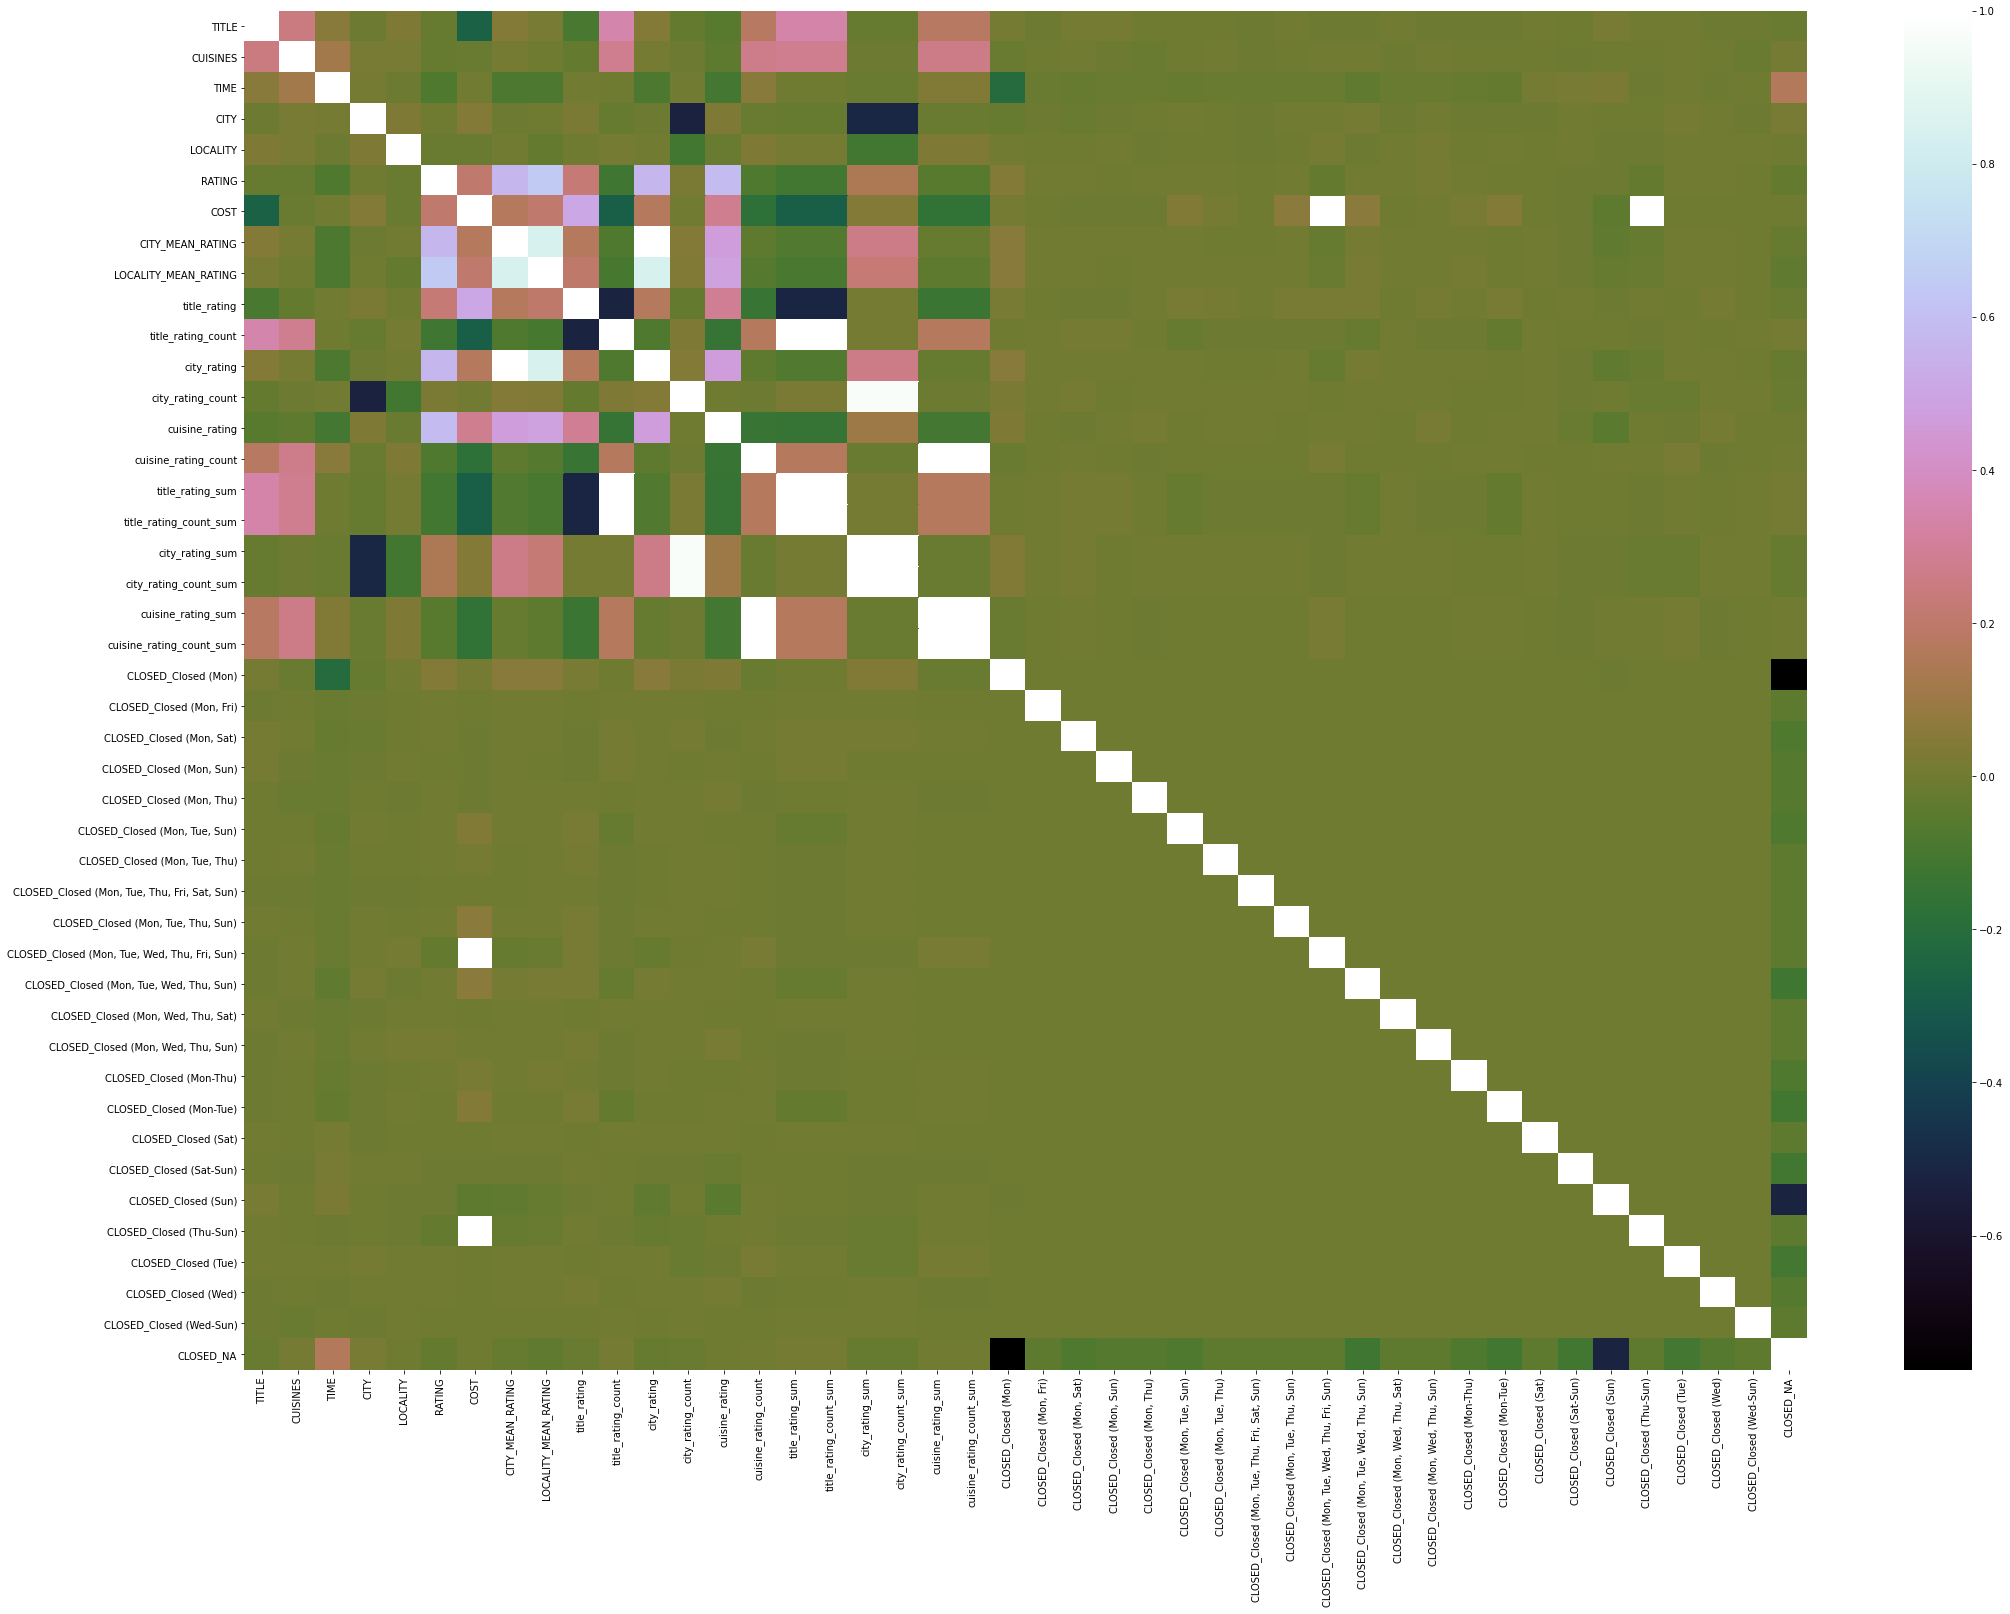

In [53]:
corr = df.corr()
plt.figure(figsize=(35,25))
sns.heatmap(corr, cmap="cubehelix")

In [54]:
train = df[df['COST'].isnull()!=True]
test = df[df['COST'].isnull()==True]
test.drop('COST', axis=1, inplace=True)

In [55]:
train.shape, test.shape

((12690, 44), (4231, 43))

In [56]:
train['COST'] = np.log1p(train['COST'])
train['COST']

0        7.090910
1        7.313887
2        6.685861
3        6.685861
4        5.707110
           ...   
12685    6.216606
12686    7.496097
12687    7.170888
12688    5.993961
12689    6.398595
Name: COST, Length: 12690, dtype: float64

In [57]:
X = train.drop(labels=['COST'], axis=1)
y = train['COST'].values

from sklearn.model_selection import train_test_split,GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=1)

In [58]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9263, 43), (9263,), (3427, 43), (3427,))

## Traning Model

In [59]:
from math import sqrt 
from sklearn.metrics import mean_squared_log_error

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet 
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Acc_matrix = []

Model_dict = {
"Linear Regression": LinearRegression(),
"Ridge Regression": Ridge(),
"Lasso Regression": Lasso(),
"ElasticNet": ElasticNet(),
"Bayesian Ridge Regression": BayesianRidge(),
"Random Forest Regressor" : RandomForestRegressor() ,
"Decision Tree Regressor": DecisionTreeRegressor(),
"Support Vector Regressor": SVR(),
"Bagging Regressor": BaggingRegressor()
}

In [61]:
for i in Model_dict:
    Model_dict[i].fit(X_train, y_train)
    print("Score Of",i,"is : ",Model_dict[i].score(X_test, y_test)*100,'%\n')
    predict = Model_dict[i].predict(X_test)
    print("Errors : \n")
    print("Mean Absolute Error : ", mean_absolute_error(y_test,predict))
    print("Mean Squared Error : ", round(mean_squared_error(y_test, predict,squared=False), 2))
    Acc_matrix.append("{:.2f}".format( r2_score(y_test, predict)))
    
    print("R2 Score : ", r2_score(y_test, predict))
    print("\n****************************\n")

Score Of Linear Regression is :  46.53400286384169 %

Errors : 

Mean Absolute Error :  0.3960169801444033
Mean Squared Error :  0.53
R2 Score :  0.46534002863841695

****************************

Score Of Ridge Regression is :  46.442663798179765 %

Errors : 

Mean Absolute Error :  0.39632699725106957
Mean Squared Error :  0.53
R2 Score :  0.46442663798179773

****************************

Score Of Lasso Regression is :  23.951157427876 %

Errors : 

Mean Absolute Error :  0.47116479460237853
Mean Squared Error :  0.63
R2 Score :  0.23951157427876002

****************************

Score Of ElasticNet is :  25.207528739567998 %

Errors : 

Mean Absolute Error :  0.4657866203244615
Mean Squared Error :  0.62
R2 Score :  0.25207528739567997

****************************

Score Of Bayesian Ridge Regression is :  46.42614405394286 %

Errors : 

Mean Absolute Error :  0.39641561838587075
Mean Squared Error :  0.53
R2 Score :  0.46426144053942864

****************************

Score Of Rand

In [62]:
data = zip(Model_dict.keys(),Acc_matrix)
df_score = pd.DataFrame(data, columns = ['Model', 'Accuracy']) 
df_score.sort_values('Accuracy', ascending=False)

,Model,Accuracy
5,Random Forest Regressor,0.73
8,Bagging Regressor,0.69
0,Linear Regression,0.47
1,Ridge Regression,0.46
4,Bayesian Ridge Regression,0.46
6,Decision Tree Regressor,0.45
7,Support Vector Regressor,0.29
3,ElasticNet,0.25
2,Lasso Regression,0.24


In [63]:
from sklearn.model_selection import cross_val_score
mean_mat = []
for i in Model_dict:
    score = cross_val_score(Model_dict[i],X_train,y_train,cv=4,scoring='r2')
    print("Score of",i," : \n\nScore :",score)
    print("Mean Score : ", score.mean())
    mean_mat.append(score.mean())
    print("Standard Deviation : ", score.std())
    print("\n***************************\n")

Score of Linear Regression  : 

Score : [0.4700837  0.45069956 0.43400902 0.43694079]
Mean Score :  0.4479332702270271
Standard Deviation :  0.014256694971787142

***************************

Score of Ridge Regression  : 

Score : [0.47070361 0.4544899  0.43415961 0.43685209]
Mean Score :  0.4490513038107572
Standard Deviation :  0.014739268427557758

***************************

Score of Lasso Regression  : 

Score : [0.26367485 0.25106634 0.24256504 0.24584891]
Mean Score :  0.2507887862883105
Standard Deviation :  0.008033679145540356

***************************

Score of ElasticNet  : 

Score : [0.27033864 0.26057365 0.2514351  0.25956766]
Mean Score :  0.260478762478381
Standard Deviation :  0.006705301451398249

***************************

Score of Bayesian Ridge Regression  : 

Score : [0.47082081 0.45430937 0.43416007 0.43685854]
Mean Score :  0.44903719926736396
Standard Deviation :  0.014764571020808746

***************************

Score of Random Forest Regressor  : 

Sco

In [64]:
data = zip(Model_dict.keys(),mean_mat)
df_score = pd.DataFrame(data, columns = ['Model', 'Mean Accuracy']) 
df_score.sort_values('Mean Accuracy', ascending=False)

,Model,Mean Accuracy
5,Random Forest Regressor,0.716397
8,Bagging Regressor,0.686912
1,Ridge Regression,0.449051
4,Bayesian Ridge Regression,0.449037
0,Linear Regression,0.447933
6,Decision Tree Regressor,0.441422
7,Support Vector Regressor,0.274747
3,ElasticNet,0.260479
2,Lasso Regression,0.250789


# Hyperparameter Tuning

In [73]:
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [int(x) for x in np.linspace(start = 0, stop = 1500, num = 8)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 8)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [0, 214, 428, 642, 857, 1071, 1285, 1500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 24, 38, 52, 67, 81, 95, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [74]:
rf = RandomForestRegressor()

rcv = RandomizedSearchCV(estimator = rf, param_distributions=random_grid,n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rcv.fit(X_train,y_train)

rcv.best_estimator_


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 134.2min finished


RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=67, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=1071, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [70]:
clf=rcv.best_estimator_

clf.fit(X_train, y_train)

print("Score is : ",clf.score(X_test, y_test)*100,'%\n')
predict = clf.predict(X_test)
print("Errors : \n")
print("Mean Absolute Error : ", mean_absolute_error(y_test,predict))
print("Mean Squared Error : ", round(mean_squared_error(y_test, predict,squared=False), 2))
Acc_matrix.append("{:.2f}".format( r2_score(y_test, predict)))
print("R2 Score : ", r2_score(y_test, predict))

Score is :  71.84080815167613 %

Errors : 

Mean Absolute Error :  0.2953110628979147
Mean Squared Error :  0.38
R2 Score :  0.7184080815167613


## predicting values of test data file

In [115]:
test['COST'] = clf.predict(test)
test['COST'] = np.e**test['COST'] - 1

In [116]:
test

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,CITY_MEAN_RATING,LOCALITY_MEAN_RATING,title_rating,title_rating_count,...,CLOSED_Closed (Mon-Tue),CLOSED_Closed (Sat),CLOSED_Closed (Sat-Sun),CLOSED_Closed (Sun),CLOSED_Closed (Thu-Sun),CLOSED_Closed (Tue),CLOSED_Closed (Wed),CLOSED_Closed (Wed-Sun),CLOSED_NA,COST
12690,34,3878,1644,324,1315,4.3,4.072628,4.020513,3.651487,4910,...,0,0,0,0,0,0,0,0,1,1311.525097
12691,104,4879,2775,278,429,4.2,4.019818,4.030769,3.589670,5634,...,0,0,0,0,0,0,0,0,1,278.267573
12692,34,4333,841,278,774,3.8,4.019818,3.950000,3.651487,4910,...,0,0,0,0,0,0,0,0,1,662.351002
12693,95,631,3182,128,847,3.8,3.888991,3.788889,3.895726,1287,...,0,0,0,0,0,0,0,0,1,248.558682
12694,104,4891,813,216,570,3.6,2.395431,2.178049,3.589670,5634,...,0,0,0,0,0,0,0,0,1,227.055596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16916,34,4259,517,317,1185,3.9,4.043786,4.034286,3.651487,4910,...,0,0,0,0,0,0,0,0,1,804.998653
16917,95,785,977,42,461,4.3,3.981623,3.670000,3.895726,1287,...,0,0,0,0,0,0,0,0,1,407.907428
16918,104,2089,3123,128,1371,3.7,3.888991,4.300000,3.589670,5634,...,0,0,0,0,0,0,0,0,1,367.060675
16919,104,4580,832,216,642,0.0,2.395431,2.807692,3.589670,5634,...,0,0,0,0,0,0,0,0,1,328.414358


## serialization

In [117]:
from joblib import dump, load
dump(clf, 'restaurant_RFR.joblib') 

['restaurant_RFR.joblib']